# Example 15.2: Enthalpy of Combustion

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
$\require{mhchem}$
Determine the enthalpy of combustion of methane ($\ce{CH4}$) at $25^\circ\mathrm{C}$ and $1\ \mathrm{atm}$, using the enthalpy of formation data from Table A-26.  Compare your result to the value listed in Table A-27.

## Solution

__[Video Explanation](https://iad.scorm.canvaslms.com/courses/sconeID/scone_prod.sha256_87aa054297c413ebf991a31433d563864e6b11c9e1d6ae0f61d482cb84ed7d2d/0/Ex15.mp4)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [3]:
from kilojoule.templates.default import *
from kilojoule.tables import Cengel

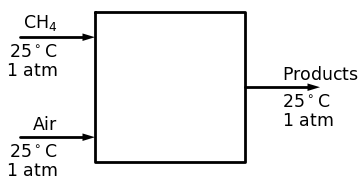

In [4]:
from kilojoule.schemdraw import *
with schemdraw.Drawing() as d:
    d += (chamb := thermo.HX(passes=3,coils=False))
    d += elm.Arrow().at(chamb.W1).left(1.5).reverse().label(r'$\mathrm{CH_4}$',halign='right').label(r'$25^\circ\mathrm{C}$'+'\n'+'$1\ \mathrm{atm}$',loc="bottom",halign='right')
    d += elm.Arrow().at(chamb.W3).left(1.5).reverse().label(r'$\mathrm{Air}$',halign='right').label(r'$25^\circ\mathrm{C}$'+'\n'+'$1\ \mathrm{atm}$',loc="bottom",halign='right')
    d += elm.Arrow().at(chamb.E).right(1.5).label(r'$\mathrm{Products}$',halign='left').label(r'$25^\circ\mathrm{C}$'+'\n'+'$1\  \mathrm{atm}$',loc="bottom",halign='left')

## Chemical Balance

\begin{equation}
	\ce{ CH4 + a_{th}(O2 + $3.76$ N2) -> a CO2 + b H2O(\ell)  + c N2 }
\end{equation}

\begin{align}
	\ce{C}:& & % Carbon Balance
    	1&=a &
        &\Rightarrow&
        a&=1\\
	\ce{H}:& & % Hydrogen Balance
    	4&=2b &
        &\Rightarrow&
        b&=2\\
	\ce{O}:& & % Oxygen Balance
    	2 a_{th}&=2a+b  &
        &\Rightarrow& 
        a_{th}&= \frac{2a+b}{2}=\frac{2(1)+2}{2}=2\\
	\ce{N2}:& & % Nitrogen Balance
    	3(3.76)&=c &
        &\Rightarrow&
        d&=7.52\\
\end{align}

\begin{equation}
	\ce{CH4 + 2(O2 + $3.76$N2) -> CO2 + 2 H2O(\ell) + $7.52$ N2}
\end{equation}

In [5]:
a = 1
b = 2
a_th = (2*a+b)/2
c = 3.76*a_th


### Property Tables



In [6]:
A26 = Cengel.Table("A26")
set_latex({f'ho_f_molar_{i}':r'\overline{h}^{\,^\circ}_{f,\mathrm{'+f'{j}'+r'}}' for i,j in (
    ('CO2','CO_2'),
    ('H2O','H_2O'),
    ('N2','N_2'),
    ('CH4','CH_4'),
    ('O2','O_2')
    )})

In [9]:
%%showcalc
"### Using Table A26"
"Moles of fuel"
N_fuel = Quantity(1,'kmol')
"Enthalpies of formation at reference state"
ho_f_molar_CO2 = (A26.ho_f_molar('CO2')).to('kJ/kmol')
ho_f_molar_H2O = A26.ho_f_molar('H2O','l')
ho_f_molar_N2 = A26.ho_f_molar('N2')
ho_f_molar_CH4 = A26.ho_f_molar('CH4')
ho_f_molar_O2 = A26.ho_f_molar('O2')
"Products"
h_products = a*ho_f_molar_CO2 + b*ho_f_molar_H2O + c*ho_f_molar_N2
"Reactants"
h_reactants = ho_f_molar_CH4 + a_th*(ho_f_molar_O2 + 3.76*ho_f_molar_N2)
"Enthalpy of combustion"
h_c = h_reactants - h_products

### Using Table A26
Moles of fuel
\begin{align}
  N_{fuel} &=  1\ \mathrm{kmol} 
\end{align}

Enthalpies of formation at reference state
\begin{align}
  \overline{h}^{\,^\circ}_{f,\mathrm{CO_2}} &=  \mathrm{ \underset{ A26 }{ ho\_f\_molar } }\left( CO2 \right)  = -3.9352\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} 
\end{align}

\begin{align}
  \overline{h}^{\,^\circ}_{f,\mathrm{H_2O}} &=  \mathrm{ \underset{ A26 }{ ho\_f\_molar } }\left( H2O, l \right)  = -2.8583\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} 
\end{align}

\begin{align}
  \overline{h}^{\,^\circ}_{f,\mathrm{N_2}} &=  \mathrm{ \underset{ A26 }{ ho\_f\_molar } }\left( N2 \right)  = 0.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}} 
\end{align}

\begin{align}
  \overline{h}^{\,^\circ}_{f,\mathrm{CH_4}} &=  \mathrm{ \underset{ A26 }{ ho\_f\_molar } }\left( CH4 \right)  = -7.485\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} 
\end{align}

\begin{align}
  \overline{h}^{\,^\circ}_{f,\mathrm{O_2}} &=  \mathrm{ \underset{ A26 }{ ho\_f\_molar } }\left( O2 \right)  = 0.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}} 
\end{align}

Products
\begin{align}
  h_{products} &=   a  \cdot  \overline{h}^{\,^\circ}_{f,\mathrm{CO_2}}  +  b  \cdot  \overline{h}^{\,^\circ}_{f,\mathrm{H_2O}}  +  c  \cdot  \overline{h}^{\,^\circ}_{f,\mathrm{N_2}}  \\
    &=   1   \cdot  -3.9352\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}}  +   2   \cdot  -2.8583\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}}  +   7.52   \cdot  0.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}} \\
    &= -9.6518\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}

Reactants
\begin{align}
  h_{reactants} &=  \overline{h}^{\,^\circ}_{f,\mathrm{CH_4}} +  a_{th}  \cdot  \left( \overline{h}^{\,^\circ}_{f,\mathrm{O_2}} +  3.76  \cdot  \overline{h}^{\,^\circ}_{f,\mathrm{N_2}}  \right)  \\
    &= -7.485\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} +   2.0   \cdot  \left( 0.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}} +  3.76  \cdot  0.0\ \frac{\mathrm{kJ}}{\mathrm{kmol}}  \right) \\
    &= -7.485\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}

Enthalpy of combustion
\begin{align}
  h_{c} &=   h_{reactants} - h_{products}  \\
    &=  -7.485\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} - \left( -9.6518\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}} \right) \\
    &= 8.9033\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}



In [11]:
A27 = Cengel.Table('A27')

In [12]:
%%showcalc
"### Using Table A.27"
"Molar Mass of $\mathrm{CH_4}$"
M_CH4 = A27.M("CH4")
"Higher Heating Value"
HHV_CH4 = A27.HHV("CH4")
"Convert to molar"
h_c_A27 = M_CH4*HHV_CH4

### Using Table A.27
Molar Mass of $\mathrm{CH_4}$
\begin{align}
  M_{CH4} &=  \mathrm{ \underset{ A27 }{ M } }\left( CH4 \right)  = 16.043\ \frac{\mathrm{kg}}{\mathrm{kmol}} 
\end{align}

Higher Heating Value
\begin{align}
  HHV_{CH4} &=  \mathrm{ \underset{ A27 }{ HHV } }\left( CH4 \right)  = 5.553\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{kg}} 
\end{align}

Convert to molar
\begin{align}
  h_{c,A27} &=   M_{CH4}  \cdot  HHV_{CH4}  \\
    &=  16.043\ \frac{\mathrm{kg}}{\mathrm{kmol}}  \cdot  5.553\times 10^{4}\ \frac{\mathrm{kJ}}{\mathrm{kg}} \\
    &= 8.9087\times 10^{5}\ \frac{\mathrm{kJ}}{\mathrm{kmol}}
\end{align}



In [10]:
# Export your solution to submit to Canvas
# 1) Ensure all cells above show your final solution
# 2) Click the 'Save' button in the toolbar
# 3) Uncomment (remove the #) from the last line in this cell
# 4) Ensure the filename in the command below matches the filename of this notebook
# 5) Execute this cell to create an HTML file showing only the output 
# 6) Submit the .html file located in the folder with this notebook

# !jupyter nbconvert --to html --no-input --no-prompt "Ex15.2 Enthalpy of Combustion.ipynb"